In [1]:
suppressMessages(library(Seurat))
suppressMessages(library(CellChat))
suppressMessages(library(stringi))
suppressMessages(library(stringr))
suppressMessages(library(networkD3))
suppressMessages(library(igraph))
suppressMessages(library(dplyr))
suppressMessages(library(SCINET))
suppressMessages(library(tidyverse))
suppressMessages(library(tidygraph))
suppressMessages(library(Matrix))
suppressMessages(library(RColorBrewer))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(ACTIONet))
suppressMessages(library(survminer))
suppressMessages(library(survival))
suppressMessages(library(corrplot))
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(pheatmap))
suppressMessages(library(lubridate))
suppressMessages(library(scales))

## CellNet function modules

### Load SCINET output data for uveal melanoma


In [2]:
####################
####  network plot 
####################

the.Net = readRDS("/home/liugerui/pro/FGN/SCINET_Network(CT)/Uveal_melanoma_STRING.RDS")   #### run.SCINET.clusters output 
names(the.Net)
the.Net[[1]]

[1] "B cells"                       "Pericytes"                    
 [3] "Melanocytes(malignant)"        "CD4+ T cells"                 
 [5] "CD8+ T cells"                  "Myeloid cells"                
 [7] "Fibroblasts"                   "NK cells"                     
 [9] "Endothelial cells"             "Plasma cells"                 
[11] "Plasmacytoid dentrictic cells"

IGRAPH cf46fcd UNW- 1241 11283 -- 
+ attr: name (v/c), specificity (v/n), weight (e/n)
+ edges from cf46fcd (vertex names):
 [1] CDK11B--RPS8    CDK11B--GPATCH2 CDK11B--RBM5    CDK11B--CCNL1  
 [5] CDK11B--CCNH    CDK11B--ELL2    CDK11B--HSPA4   CDK11B--KMT2E  
 [9] CDK11B--DDX3X   CDK11B--YWHAZ   CDK11B--CKS2    CDK11B--SF1    
[13] CDK11B--LRRK2   CDK11B--CCNT1   CDK11B--HIF1A   CDK11B--RBM25  
[17] CDK11B--RNPS1   CDK11B--RARA    CDK11B--DDX5    CDK11B--YWHAB  
[21] CDK11B--CDC37   CDK11B--DDX17   RPL22 --CDC42   RPL22 --RPL11  
[25] RPL22 --ZNF593  RPL22 --RPS8    RPL22 --RC3H1   RPL22 --DUSP10 
[29] RPL22 --PARP1   RPL22 --HNRNPU  RPL22 --ZFP36L2 RPL22 --DDX18  
+ ... omitted several edges

In [3]:
celltype_ig = the.Net[["Melanocytes(malignant)"]]
celltype_ig
celltype_net = get.edgelist(celltype_ig) %>% as.data.frame()
celltype_net$weight = E(celltype_ig)$weight
head(celltype_net)

IGRAPH e421343 UNW- 3454 49445 -- 
+ attr: name (v/c), specificity (v/n), weight (e/n)
+ edges from e421343 (vertex names):
 [1] ANKRD65--CDK18    ANKRD65--CDK15    ANKRD65--RAB17    ANKRD65--PLEKHG4B
 [5] ANKRD65--RAB24    ANKRD65--DAB2IP   ANKRD65--RPS3     ANKRD65--CDK2    
 [9] ANKRD65--RAB5B    ANKRD65--CDK4     ANKRD65--WBP4     ANKRD65--AFG3L2  
[13] ATAD3C --ABHD11   ATAD3C --AIFM1    ATAD3C --C1QBP    ATAD3C --NFS1    
[17] ATAD3C --PLEKHA4  SSU72  --PRDX6    SSU72  --CPSF3    SSU72  --BOLA3   
[21] SSU72  --WDFY1    SSU72  --CFAP44   SSU72  --IFT122   SSU72  --WDR17   
[25] SSU72  --DNPH1    SSU72  --TBL2     SSU72  --CPSF4    SSU72  --PPEF1   
[29] SSU72  --RBM3     SSU72  --LACTB2   SSU72  --CPSF1    SSU72  --PPP1CC  
+ ... omitted several edges

,V1,V2,weight
,<chr>,<chr>,<dbl>
1,ANKRD65,CDK18,2.905539
2,ANKRD65,CDK15,2.549217
3,ANKRD65,RAB17,2.976837
4,ANKRD65,PLEKHG4B,2.976837
5,ANKRD65,RAB24,2.493798
6,ANKRD65,DAB2IP,2.041759


In [4]:
aaa = get.vertex.attribute(celltype_ig)
cellytype_node = data.frame(gene = aaa$name,specificity = aaa$specificity)

net.matrix = matrix(0,nrow = unique(c(celltype_net$V1,celltype_net$V2))%>% length() ,
                    ncol = unique(c(celltype_net$V1,celltype_net$V2))%>% length() )
rownames(net.matrix) = unique(c(celltype_net$V1,celltype_net$V2))
colnames(net.matrix) = unique(c(celltype_net$V1,celltype_net$V2))

for(x in 1:nrow(celltype_net)){
  net.matrix[celltype_net$V1[x],celltype_net$V2[x]]=celltype_net$weight[x]
}

In [5]:
net_list = list(net = net.matrix,node = cellytype_node)
### saveRDS(net_list,"/data1/lizekun/CellNetdb/web_version/CellNetdb/data/new_Network/Uveal_melanoma_STRING_Melanocytes(malignant).RDS")

net_list

,ANKRD65,ATAD3C,SSU72,PEX10,MMEL1,ARHGEF16,SMIM1,CHD5,ACOT7,KLHL21,⋯,C14orf39,ZNF648,ERICH2,AANAT,NT5DC4,XAGE3,ASPDH,SAGE1,ATOH7,SLC13A5
ANKRD65,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ATAD3C,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SSU72,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
PEX10,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
MMEL1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ARHGEF16,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SMIM1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CHD5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ACOT7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
KLHL21,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0



### The subnetwork in "CellNet" page depicts the interactions between the queried gene and its neighboring genes within the malignant cell-specific network of uveal melanoma.


In [6]:
generate_Net <- function(net_list,the.gene){
  
  net = net_list$net
  
  geneset = c(
    rownames(net)[which(net[,the.gene] != 0)],
    colnames(net)[which(net[the.gene,] != 0)],the.gene
  ) %>% unique()
  
  bg = rownames(net)
  net = net[geneset,geneset]
  adj_net = net + t(net)
  result_net=adj_net
  
  Node_size = rowSums(adj_net)
  
  net = reshape2::melt(net)
  net = net[which(net$value!=0),]
  
  src <- net$Var1 %>% as.character()
  target <- net$Var2 %>% as.character()
  networkData <- data.frame(src, target)
  
  MisNodes <- data.frame(name=unique(c(src, target)),
                         group= 1,size = 1)
  MisLinks <- data.frame(source = (match(networkData$src, MisNodes$name)-1),
                         target = (match(networkData$target, MisNodes$name)-1),
                         value = 1)
  MisNodes$group[which(MisNodes$name %in% the.gene)] = 2
  MisNodes$size = Node_size[MisNodes$name] %>% as.integer()
  
  result = list(MisNodes = MisNodes,
                MisLinks = MisLinks,
                bg = bg,
                net =result_net)
  
  
}



In [7]:
plot.Net = generate_Net(net_list,"MDK")

In [8]:
## plot the "MDK" network

ColourScale <- 'd3.scaleOrdinal()
.domain(["1", "2"])
.range(["#ABC2E1","#0868A3"]);'

forceNetwork(Links = plot.Net$MisLinks, Nodes = plot.Net$MisNodes,
             Source = "source", Target = "target",
             Value = "value", NodeID = "name",Nodesize = "size",fontSize = 20,
             Group = "group",legend = F,arrows = F,opacity = 1,colourScale = JS(ColourScale),zoom = TRUE,fontFamily = "Arial")


HTML widgets cannot be represented in plain text (need html)

In [9]:
setwd("/data1/lizekun/CellNetdb/web_version/CellNetdb")


### The "Mutation" panel provides somatic mutation spectra of the subnetwork genes.
#### Source: [COSMIC](https://cancer.sanger.ac.uk/cosmic) v96


In [10]:
#################################
####  CellNet Mutation module 
#################################

tab_mut = readRDS("./data/final_mutation_Cancer/Uveal melanoma_STRING_Melanocytes (malignant).RDS")
tab_mut <- unique(tab_mut)
head(tab_mut)

,Symble,Mutation genome position,Mutation strand,Mutation AA,Mutation Description,HGVSG
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
14,P3H4,17:41810916-41810916,-,p.C245F,Substitution - Missense,17:g.41810916C>A
16,TJP2,9:69254452-69254452,+,p.?,Unknown,9:g.69254452C>A
27,PSG5,19:43185103-43185103,-,p.T37A,Substitution - Missense,19:g.43185103T>C
31,VWA5A,11:124117792-124117792,+,p.M55V,Substitution - Missense,11:g.124117792A>G
59,HSD17B14,19:48815072-48815072,-,p.G147S,Substitution - Missense,19:g.48815072C>T
62,ABCA13,7:48594747-48594747,+,p.R4893Q,Substitution - Missense,7:g.48594747G>A


In [11]:
plot.Net$MisNodes$name

[1] "OBSL1"   "ALK"     "PTPRZ1"  "MDK"     "CSPG5"   "CDK2"    "ERBB3"  
 [8] "CDK4"    "DAG1"    "TUBB2B"  "ACTG1"   "ERBB2"   "BCAN"    "LRP6"   
[15] "RAC3"    "ZCCHC17" "EPB41L5" "PEBP1"   "BCL2L1"  "FBXO7"   "APP"    
[22] "LRRTM1"

In [12]:
tab_mut = tab_mut[which(tab_mut$Symble %in% plot.Net$MisNodes$name),]
tab_mut = tab_mut[order(tab_mut$Symble),]
tab_mut$HGVSG = paste("chr",tab_mut$HGVSG,sep = "")
tab_mut$`Mutation genome position` = paste("chr",tab_mut$`Mutation genome position`,sep = "")
head(tab_mut)

,Symble,Mutation genome position,Mutation strand,Mutation AA,Mutation Description,HGVSG
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1055,BCAN,chr1:156647526-156647526,+,p.R162Q,Substitution - Missense,chr1:g.156647526G>A
66,OBSL1,chr2:219567297-219567297,-,p.V605M,Substitution - Missense,chr2:g.219567297C>T
4661,OBSL1,chr2:219567297-219567297,-,p.V192M,Substitution - Missense,chr2:g.219567297C>T



### The "GO" panel provides GO terms significantly enriched for genes involved in the queried subnetwork. 
#### Source: [Gene Ontology database](https://release.geneontology.org/2022-06-15)


In [13]:
########################
####  CellNet GO module 
#########################
GO.list = readRDS("./data/GO_reference.RDS")                             ##  each GO Term genelist
GO_gene_set = readRDS("./data/GO_gene_set.RDS")                          ##  BP,CC,MF genelist


In [14]:
GO.list[[1]]

$id
[1] "GO:0006103"

$type
[1] "GO:BP"

$name
[1] "GOBP_2_OXOGLUTARATE_METABOLIC_PROCESS"

$geneset
 [1] "AADAT"  "ADHFE1" "D2HGDH" "DLD"    "DLST"   "GOT1"   "GOT2"   "GPT2"  
 [9] "IDH1"   "IDH2"   "KYAT3"  "L2HGDH" "MRPS36" "OGDH"   "PHYH"   "TAT"

In [15]:
names(GO_gene_set)

[1] "GO:BP" "GO:CC" "GO:MF"

In [16]:
fun_for_GO <- function(total_geneset,GO.list,total_universe){
  
  overlap = data.frame(
    
    GO_id = names(GO.list),
    GO_name = "",
    overlap_for_inter = 0,
    overlap_for_uniANDref = 0,
    overlap_for_uniDIFFref = 0,
    genesetLEN = 0,
    pvalue = 1,
    genes = "",
    GeneRatio = "",
    BgRatio = "",
    fold_enrichment = 0,
    type = ""
    
  )
  
  geneset_List = list(
    `GO:BP` = intersect(GO_gene_set$`GO:BP` , total_geneset) ,
    `GO:CC` = intersect(GO_gene_set$`GO:CC` , total_geneset) ,
    `GO:MF` = intersect(GO_gene_set$`GO:MF` , total_geneset)
  )
  
  universe_List = list(
    `GO:BP` = intersect(GO_gene_set$`GO:BP` , total_universe) ,
    `GO:CC` = intersect(GO_gene_set$`GO:CC` , total_universe) ,
    `GO:MF` = intersect(GO_gene_set$`GO:MF` , total_universe)
  )
  
  for(i in 1:nrow(overlap)){
    
    GO_id = overlap$GO_id[i]
    the.type = GO.list[[GO_id]]$type
    
    universe = universe_List[[the.type]]
    geneset = geneset_List[[the.type]]
    
    
    overlap_for_inter = intersect(GO.list[[GO_id]]$geneset , geneset)
    if(length(overlap_for_inter)<2 ){
      next
    }
    
    overlap_for_uniANDref = intersect(GO.list[[GO_id]]$geneset,universe )
    overlap_for_uniDIFFref = setdiff(universe , GO.list[[GO_id]]$geneset)
    
    overlap$overlap_for_inter[i] = length(overlap_for_inter)
    overlap$overlap_for_uniANDref[i] = overlap_for_uniANDref %>% length()
    overlap$overlap_for_uniDIFFref[i] = overlap_for_uniDIFFref %>% length()
    overlap$genesetLEN[i] = length(geneset)
    
    overlap$genes[i] = paste0(overlap_for_inter,collapse = ",")
    overlap$GeneRatio[i] = paste(length(overlap_for_inter),"/", length(geneset) ,sep = " ")
    overlap$BgRatio[i] = paste(length(overlap_for_uniANDref),"/", length(universe) ,sep = " ")
    
    overlap$fold_enrichment[i] = ( length(overlap_for_inter)/length(geneset) ) / ( length(overlap_for_uniANDref)/length(universe) )
    
    overlap$pvalue[i] = phyper(
      
      overlap$overlap_for_inter[i] - 1,
      overlap$overlap_for_uniANDref[i],
      overlap$overlap_for_uniDIFFref[i],
      overlap$genesetLEN[i],
      lower.tail = F
      
    )
    
    overlap$GO_name[i] = GO.list[[GO_id]]$name
    overlap$type[i] = GO.list[[GO_id]]$type
    
  }
  
  overlap <- overlap[overlap$overlap_for_inter >0,]
  
  BP_overlap <- overlap[overlap$type %in% "GO:BP" ,]
  CC_overlap <- overlap[overlap$type %in% "GO:CC" ,]
  MF_overlap <- overlap[overlap$type %in% "GO:MF" ,]
  
  
  BP_overlap$FDR <- p.adjust(BP_overlap$pvalue,method = "fdr")
  CC_overlap$FDR <- p.adjust(CC_overlap$pvalue,method = "fdr")
  MF_overlap$FDR <- p.adjust(MF_overlap$pvalue,method = "fdr")
  
  overlap_adj <- rbind(BP_overlap,CC_overlap,MF_overlap)
  
  
  overlap_adj = overlap_adj[which(overlap_adj$pvalue<0.01),]
  
  return(overlap_adj)
  
}

Integration_GO <- function(input_tab){
  
  input_tab = input_tab[,c(1,2,9,10,11,12,7,13)]
  colnames(input_tab) = c(
    "GO term ID",
    "GO term name",
    "GeneRatio",
    "BgRatio",
    "Fold enrichment",
    "Type",
    "P-value",
    "FDR"
  )
  input_tab$`GO term name` = gsub(input_tab$`GO term name`,pattern = "GOBP_|GOMF|GOCC_",replacement = "")
  input_tab$Type = factor(input_tab$Type,levels = c("GO:BP","GO:MF","GO:CC"))
  
  input_tab = input_tab[order(input_tab$Type,input_tab$`P-value`),]
  input_tab$`P-value` = sprintf("%0.2e", input_tab$`P-value`)
  input_tab$FDR = sprintf("%0.2e", input_tab$FDR)
  input_tab$`Fold enrichment` = round(input_tab$`Fold enrichment`,digits = 1)
  
  
  return(input_tab)
  
}


In [17]:
tab_go = fun_for_GO(plot.Net$MisNodes$name,GO.list,plot.Net$bg)
tab_go = Integration_GO(tab_go)
head(tab_go)


,GO term ID,GO term name,GeneRatio,BgRatio,Fold enrichment,Type,P-value,FDR
,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>,<chr>
3845,GO:0010810,REGULATION_OF_CELL_SUBSTRATE_ADHESION,6 / 22,28 / 3003,29.2,GO:BP,2.51e-08,9.65e-06
2943,GO:0010811,POSITIVE_REGULATION_OF_CELL_SUBSTRATE_ADHESION,5 / 22,16 / 3003,42.7,GO:BP,5.38e-08,9.65e-06
3813,GO:0030155,REGULATION_OF_CELL_ADHESION,8 / 22,87 / 3003,12.6,GO:BP,8.25e-08,9.65e-06
1178,GO:0010001,GLIAL_CELL_DIFFERENTIATION,7 / 22,58 / 3003,16.5,GO:BP,9.43e-08,9.65e-06
1181,GO:0042063,GLIOGENESIS,7 / 22,70 / 3003,13.6,GO:BP,3.57e-07,2.92e-05
434,GO:0000904,CELL_MORPHOGENESIS_INVOLVED_IN_DIFFERENTIATION,9 / 22,152 / 3003,8.1,GO:BP,4.87e-07,2.93e-05



### The "Disease" panel provides diseases significantly enriched for genes involved in the queried subnetwork. 
#### Source: [DisGeNET database](https://www.disgenet.org/) (v7.0)


In [18]:
###########################
####  CellNet Disease module 
############################

disease.ls = readRDS("./data/disease.RDS")                             ###  DisGeNET disease genelist

names(disease.ls) %>% head()

[1] "Hepatomegaly"             "Schizophrenia"           
[3] "Alzheimer's Disease"      "Malignant tumor of colon"
[5] "Colonic Neoplasms"        "Presenile dementia"

In [19]:
df <- reshape2::melt(disease.ls)
Disease_gene_set = df$value %>% unique() 
length(Disease_gene_set)

[1] 8724

In [20]:
fun_for_Disease <- function(total_geneset,disease.ls,total_universe){
  
  
  universe = intersect( total_universe , Disease_gene_set )
  geneset = intersect( total_geneset , Disease_gene_set )
  
  overlap = data.frame(
    
    disease = names(disease.ls),
    overlap_for_inter = 0,
    overlap_for_uniANDref = 0,
    overlap_for_uniDIFFref = 0,
    genesetLEN = 0,
    pvalue = 1,
    genes = "",
    GeneRatio = "",
    BgRatio = "",
    fold_enrichment = 0
    
  )
  
  for(i in 1:nrow(overlap)){
    
    disease_name = overlap$disease[i]
    
    overlap_for_inter = intersect(disease.ls[[disease_name]] , geneset)
    if(length(overlap_for_inter)<2 ){
      next
    }
    
    overlap_for_uniANDref = intersect(disease.ls[[disease_name]],universe )
    overlap_for_uniDIFFref = setdiff(universe , disease.ls[[disease_name]])
    
    overlap$overlap_for_inter[i] = length(overlap_for_inter)
    overlap$overlap_for_uniANDref[i] = overlap_for_uniANDref %>% length()
    overlap$overlap_for_uniDIFFref[i] = overlap_for_uniDIFFref %>% length()
    overlap$genesetLEN[i] = length(geneset)
    
    overlap$genes[i] = paste0(overlap_for_inter,collapse = ",")
    overlap$GeneRatio[i] = paste(length(overlap_for_inter),"/", length(geneset) ,sep = " ")
    overlap$BgRatio[i] = paste(length(overlap_for_uniANDref),"/", length(universe) ,sep = " ")
    
    overlap$fold_enrichment[i] = ( length(overlap_for_inter)/length(geneset) ) / ( length(overlap_for_uniANDref)/length(universe) )
    
    overlap$pvalue[i] = phyper(
      
      overlap$overlap_for_inter[i] - 1,
      overlap$overlap_for_uniANDref[i],
      overlap$overlap_for_uniDIFFref[i],
      overlap$genesetLEN[i],
      lower.tail = F
      
    )
    
  }
  
  overlap <- overlap[overlap$overlap_for_inter >0,]
  overlap$FDR <- p.adjust(overlap$pvalue,method = "fdr")
  overlap = overlap[which(overlap$pvalue<0.01),]
  
  return(overlap)
  
}
Integration_Disease <- function(input_tab){
  
  input_tab = input_tab[,c(1,8,9,10,6,11)]
  colnames(input_tab) = c(
    "Disease",
    "GeneRatio",
    "BgRatio",
    "Fold enrichment",
    "P-value",
    "FDR"
  )
  
  options(scipen = 1)
  
  input_tab = input_tab[order(input_tab$`P-value`),]
  input_tab$`P-value` = sprintf("%0.2e", input_tab$`P-value`)
  input_tab$FDR = sprintf("%0.2e", input_tab$FDR)
  input_tab$`Fold enrichment` = round(input_tab$`Fold enrichment`,digits = 1)
  
  return(input_tab)
  
}


In [21]:
tab_disease = fun_for_Disease(plot.Net$MisNodes$name,disease.ls,plot.Net$bg)
tab_disease = tab_disease %>% Integration_Disease()
head(tab_disease)

,Disease,GeneRatio,BgRatio,Fold enrichment,P-value,FDR
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
269,Animal Mammary Neoplasms,5 / 19,33 / 1599,12.8,2.59e-05,3.10e-04
280,"Mammary Carcinoma, Animal",5 / 19,33 / 1599,12.8,2.59e-05,3.10e-04
266,Carcinoma,5 / 19,34 / 1599,12.4,3.02e-05,3.10e-04
272,Anaplastic carcinoma,5 / 19,34 / 1599,12.4,3.02e-05,3.10e-04
273,"Carcinoma, Spindle-Cell",5 / 19,34 / 1599,12.4,3.02e-05,3.10e-04
274,Undifferentiated carcinoma,5 / 19,34 / 1599,12.4,3.02e-05,3.10e-04



### Load a Seurat object to create a CellChat data


In [22]:
###################################
#######  Generate CellChat data
###################################
seurat_object = readRDS("/data1/lizekun/sc_cancer/2.re_cluster/total_cells/RDS/Solid_tumor/Uveal_melanoma.rds")    
seurat_object

An object of class Seurat 
27709 features across 23691 samples within 2 assays 
Active assay: RNA (25709 features, 0 variable features)
 1 other assay present: CCA
 2 dimensional reductions calculated: pca, umap

In [23]:
data.input  <- seurat_object@assays$RNA@data
identity = data.frame( group = Idents(seurat_object) , row.names = rownames(seurat_object@meta.data) )
identity$group = identity$group %>% as.character() %>% as.factor()
head(identity) 

,group
,<fct>
LH16.3814_AAACCTGGTCTACCTC-1,Melanocytes(malignant)
LH16.3814_AAACCTGGTGACGCCT-1,Melanocytes(malignant)
LH16.3814_AAACCTGTCGTTACGA-1,Melanocytes(malignant)
LH16.3814_AAACGGGAGGTGTTAA-1,Melanocytes(malignant)
LH16.3814_AAACGGGCAAATCCGT-1,Melanocytes(malignant)
LH16.3814_AAACGGGCATTTGCCC-1,Melanocytes(malignant)


In [24]:
cellchat <- createCellChat(data.input)
CellChatDB <- CellChat::CellChatDB.human
cellchat@DB = CellChatDB
cellchat <- addMeta(cellchat, meta = identity, meta.name = "labels")
cellchat <- setIdent(cellchat, ident.use = "labels")

Create a CellChat object from a data matrix



In [25]:
cellchat <- subsetData(cellchat)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
cellchat <- projectData(cellchat, CellChat::PPI.human)

In [26]:
cellchat <- computeCommunProb(cellchat)
cellchat <- computeCommunProbPathway(cellchat)
cellchat <- aggregateNet(cellchat)
### saveRDS(cellchat,file = paste("/home/liugerui/pro/FGN/CellChat_result/","Uveal_melanoma",".RDS",sep = ""))

cellchat

An object of class CellChat created from a single dataset 
 25709 genes.
 23691 cells.


#### Only show the ligand-receptor pair with P-value < 0.05


In [27]:
###CellChat data Optimized

cellchat@net$adj_prob <- cellchat@net$prob
LR_list = list()

cellchat@netP$pathways

for(j in 1:length(cellchat@netP$pathways)){
  
  the.path = cellchat@netP$pathways[j]
  
  tab = searchPair(signaling = the.path, pairLR.use = cellchat@LR$LRsig,key = "pathway_name", matching.exact = T, pair.only = T) #get L-R
  tab$score = 0
  for(net_name in tab$interaction_name){
    net = cellchat@net$prob[,, net_name]
    pvalue_net = cellchat@net$pval[,, net_name]
    adj_net <- net
    adj_net[pvalue_net > 0.05] <- 0
    
    tab$score[which(tab$interaction_name == net_name)] = adj_net %>% sum()
    cellchat@net$adj_prob[,, net_name] <- adj_net
  }
  tab = tab[which(tab$score != 0),]
  LR_list[[1 + length(LR_list)]] = tab
  
}

LR_list = do.call("rbind",LR_list)
cellchat_net_list = cellchat@net$adj_prob[,,LR_list$interaction_name]

new_cellchat = list(LR = LR_list, net = cellchat_net_list)

#### saveRDS(new_cellchat , "/data1/lizekun/CellNetdb/web_version/CellNetdb/data/new_cellchat/Uveal_melanoma.RDS")



### The "Communication" panel allows users to investigate how the local network influences cell-cell interactions between different cell types. 


In [28]:
#################################
####  CellNet CellChat module 
##################################

generate_Cellchat_data <- function(input_list,geneset){
  
  cellchat_data = input_list
  LR = cellchat_data$LR
  net = cellchat_data$net
  
  used_LR = c()
  for(i in 1:nrow(LR)){
    
    intersect_gene = LR$interaction_name[i] %>% str_split(pattern = "_") %>% unlist()
    
    if(intersect(intersect_gene,geneset) %>% length() >0){
      used_LR = c( used_LR , LR$interaction_name[i] )
    }
  }
  
  used_LR = LR[which(LR$interaction_name %in% used_LR),]
  used_net = net[,,used_LR$interaction_name]
  
  result = list(LR = used_LR,
                net = used_net)
  return(result)
  
}
Integration_Cellchat <- function(input_tab,geneset){
  
  input_tab = input_tab$LR
  colnames(input_tab) = c(
    "Ligand-receptor pair",
    "Gene in network",
    "Ligand",
    "Receptor",
    "Communication score"
  )
  if(nrow(input_tab) == 0){
    return(input_tab)
  }
  
  input_tab = input_tab[order(input_tab$`Communication score`,decreasing = T),]
  for(i in 1:nrow(input_tab)){
    
    genes = paste(input_tab$Ligand[i],input_tab$Receptor[i],sep = "_") %>% str_split(pattern = "_") %>% unlist()
    input_tab$`Gene in network`[i] = intersect(genes,geneset) %>% paste0(collapse = ",")
    
  }
  input_tab$`Communication score` = round(input_tab$`Communication score`,digits = 3)
  # input_tab = input_tab[,-1]
  return(input_tab)
  
}


In [29]:
tab_cellchat = generate_Cellchat_data(new_cellchat,geneset=plot.Net$MisNodes$name)
tab_cellchat_end =  Integration_Cellchat(input_tab = tab_cellchat ,geneset = plot.Net$MisNodes$name)
head(tab_cellchat_end)

,Ligand-receptor pair,Gene in network,Ligand,Receptor,Communication score
,<chr>,<chr>,<chr>,<chr>,<dbl>
APP_CD74,APP_CD74,APP,APP,CD74,4.406
MDK_NCL,MDK_NCL,MDK,MDK,NCL,1.339
MDK_LRP1,MDK_LRP1,MDK,MDK,LRP1,0.127
MDK_ITGA6_ITGB1,MDK_ITGA6_ITGB1,MDK,MDK,ITGA6_ITGB1,0.108
MDK_SDC2,MDK_SDC2,MDK,MDK,SDC2,0.074
MDK_ITGA4_ITGB1,MDK_ITGA4_ITGB1,MDK,MDK,ITGA4_ITGB1,0.073


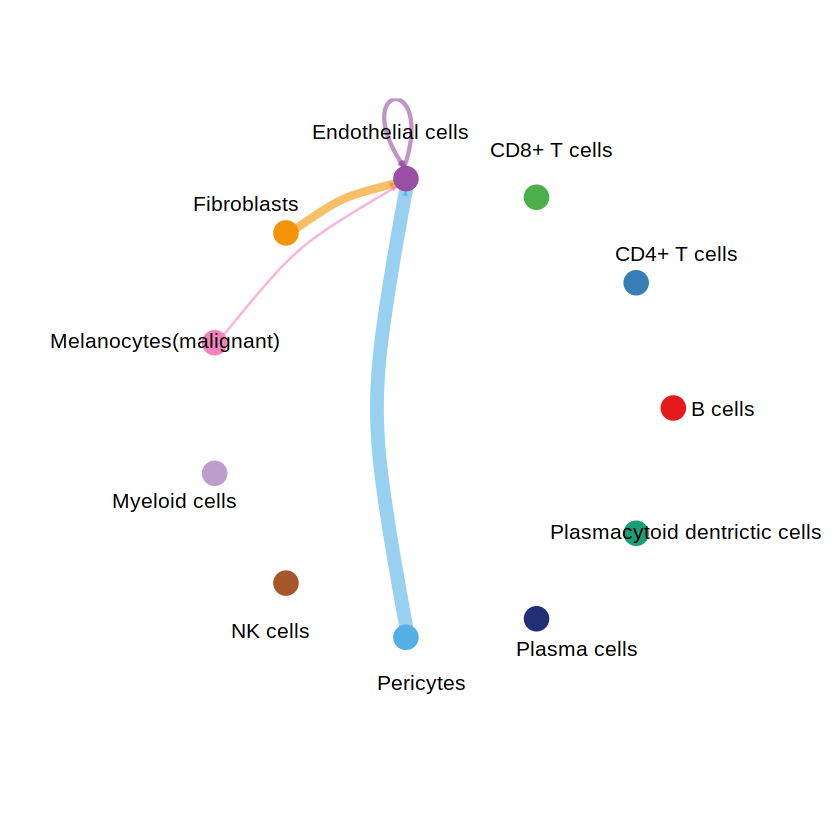

In [30]:
#  "MDK-ITGA6-ITGB1"  example

net = tab_cellchat$net[,, "MDK_ITGA6_ITGB1"]
demo_cellchat_plot = netVisual_circle(net,weight.scale = T,arrow.size = 0.2)



## Gene prioritization

#### We have implemented the random walk with restart (RWR) algorithm to prioritize interested genes based on the cell-type-specific interactome networks.


In [31]:
#################################
####  Analysis module 
##################################
### Prioritize risk genes based on random walk with restart(RWR)


#' Title. Convert the upper triangular matrix to a symmetric matrix
#' 
#' @param net a upper triangular matrix
#'
#' @return Symmetric matrices

get_W <- function(net) {
  
  net = net + t(net) - diag(diag(net))
  return(net)
  
}

In [32]:
#' Title. Calculate the transition probability matrix, which is the 1/degrees
#' 
#' @param net a upper triangular matrix
#' @return transition probability matrix

get_Q <- function(net){
  
  if(!isSymmetric(net[1:100,1:100])){
    net = get_W(net)
  }
  
  WIj = rowSums(net)
  
  for(i in 1:nrow(net)){
    net[i,] = net[i,] / WIj
  }
  
  return(net)
}

In [33]:
#' Title. get the vector of initial probability distribution for all genes
#' 
#' @param net a upper triangular matrix
#' @param seeds seed genes
#' 
#' @return the vector of initial probability distribution

get_R0 <- function(net,seeds){
  
  is_seed = rep(0,nrow(net))
  is_seed[which(rownames(net) %in% seeds)] = 1
  is_seed = is_seed/sum(is_seed)
  
  return(is_seed)
  
}

In [34]:
#' Title get the final gene scores
#'
#' @param net  a parameter to measure the importance of genes and interactions
#' @param seeds the vector of initial disease risk scores for all genes
#' @param threshold the threshold for ending the iteration
#' 
#' @return final gene probability distribution (vector)
#' @export

get_R <- function(net, seeds , threshold = 10^(-10) , bet = 0.5) {
  
  QQ = get_Q(net)
  R_0 = get_R0(net,seeds)
  
  R_dise <- 1
  R_old <- R_0 
  kk <- 1
  
  while (R_dise > threshold) {
    
    R_new <- (1 - bet) * QQ %*% R_old + bet * R_0
    Po_old = norm(as.matrix(R_old), "F")
    Po_new = norm(as.matrix(R_new), "F")
    R_dise <- abs(Po_new - Po_old)
    R_old <- R_new
    kk <- kk + 1
    
    print(kk)
    
  }
  
  print(kk)
  names(R_new) = rownames(QQ)
  R_new = sort(R_new,decreasing = T)
  
  return(R_new)
  
}


#### Utilizing genes annotated in the Cancer Gene Census (CGC) as seed genes , the prioritization of risk genes was performed using malignant cell-specific networks. 

#### The Network of Cancer Genes (NCG) 6.0 database was used as a benchmark to assess the performance of RWR prediction.


In [35]:
CGC = read_tsv("/data1/lizekun/refdata/CancerDriver/CGC/Census_allMon Sep  4 09_36_00 2023.tsv")                     ####  https://cancer.sanger.ac.uk/census
NCG = read_tsv("/data1/lizekun/refdata/CancerDriver/NCG/NCG_cancerdrivers_annotation_supporting_evidence.tsv")         ####  http://ncg.kcl.ac.uk/download.php


Rows: 738 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (17): Gene Symbol, Name, Genome Location, Hallmark, Somatic, Germline, T...
dbl  (3): Entrez GeneId, Tier, Chr Band

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8886 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (10): symbol, type, organ_system, primary_site, cancer_type, method, cod...
dbl  (4): entrez, pubmed_id, NCG_oncogene, NCG_tsg

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [36]:
genes_in_NCG = NCG$symbol %>% unique()
length(genes_in_NCG)

[1] 3347

In [37]:
head(CGC)

Gene Symbol,Name,Entrez GeneId,Genome Location,Tier,Hallmark,Chr Band,Somatic,Germline,Tumour Types(Somatic),Tumour Types(Germline),Cancer Syndrome,Tissue Type,Molecular Genetics,Role in Cancer,Mutation Types,Translocation Partner,Other Germline Mut,Other Syndrome,Synonyms
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A1CF,APOBEC1 complementation factor,29974,10:50799421-50885675,2,NA,11.23,yes,NA,melanoma,NA,NA,E,NA,oncogene,Mis,NA,NA,NA,"ACF,ACF64,ACF65,APOBEC1CF,ASP,CCDS73133.1,ENSG00000148584.14,NM_001198819.1,NP_001185748"
ABI1,abl-interactor 1,10006,10:26746593-26860935,1,Yes,12.10,yes,NA,AML,NA,NA,L,Dom,"TSG, fusion",T,KMT2A,NA,NA,"ABI-1,CCDS7150.1,E3B1,ENSG00000136754.17,NM_005470.3,NP_005461,NP_001334958.1,Q8IZP0,SSH3BP1"
ABL1,v-abl Abelson murine leukemia viral oncogene homolog 1,25,9:130713946-130885683,1,Yes,34.12,yes,NA,"CML, ALL, T-ALL",NA,NA,L,Dom,"oncogene, fusion","T, Mis","BCR, ETV6, NUP214",NA,NA,"ABL,CCDS35165.1,ENSG00000097007.17,JTK7,NM_007313.2,NP_009297,P00519,c-ABL,p150"
ABL2,"c-abl oncogene 2, non-receptor tyrosine kinase",27,1:179099327-179229601,1,NA,25.20,yes,NA,AML,NA,NA,L,Dom,"oncogene, fusion",T,ETV6,NA,NA,"ABLL,ARG,CCDS30947.1,ENSG00000143322.19,NM_007314.3,NP_009298,P42684"
ACKR3,atypical chemokine receptor 3,57007,2:236569641-236582358,1,Yes,37.30,yes,NA,lipoma,NA,NA,M,Dom,"oncogene, fusion",T,HMGA2,NA,NA,"CCDS2516.1,CMKOR1,CXCR7,ENSG00000144476.5,GPR159,NM_020311.2,NP_064707,P25106,RDC1"
ACSL3,acyl-CoA synthetase long-chain family member 3,2181,2:222860934-222944639,1,Yes,36.10,yes,NA,prostate,NA,NA,E,Dom,fusion,T,ETV1,NA,NA,"ACS3,CCDS2455.1,ENSG00000123983.13,FACL3,NM_004457.3,NP_004448,NP_001341088.1,NP_001341087.1,O95573,PRO2194"


In [38]:
head(NCG)

entrez,symbol,pubmed_id,type,organ_system,primary_site,cancer_type,method,coding_status,cgc_annotation,vogelstein_annotation,saito_annotation,NCG_oncogene,NCG_tsg
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
23,ABCF1,31444325,WGS-WES,Hematologic and lymphatic,blood,multiple_myeloma,dNdScv,coding,NA,NA,NA,NA,NA
25,ABL1,29625053,Pan-cancer,Multiple,multiple,pan-cancer_adult,PanSoftWare,coding,"oncogene, fusion",Oncogene,NA,1,0
25,ABL1,14993899,Canonical Cancer Driver,Multiple,multiple,NA,-,NA,"oncogene, fusion",Oncogene,NA,1,0
25,ABL1,29489755,Pan-cancer,Multiple,multiple,pan-cancer_paediatric,"GRIN, MutSig",coding,"oncogene, fusion",Oncogene,NA,1,0
25,ABL1,23539594,Canonical Cancer Driver,Multiple,multiple,NA,-,NA,"oncogene, fusion",Oncogene,NA,1,0
27,ABL2,14993899,Canonical Cancer Driver,Multiple,multiple,NA,-,NA,"oncogene, fusion",NA,NA,1,0



#### Using melanoma-associated CGC genes as seed genes


In [39]:
CGC$Tumour = paste(CGC$`Tumour Types(Somatic)`,",",CGC$`Tumour Types(Somatic)`,sep = "")

seeds_in_CGC = CGC$`Gene Symbol`[which( CGC$`Tumour Types(Somatic)` %>% str_detect(pattern = "melanoma"))] %>% unique()
genes_in_NCG = NCG$symbol %>% unique()

## net_list <- readRDS("/data1/lizekun/CellNetdb/web_version/CellNetdb/data/new_Network/Uveal_melanoma_STRING_Melanocytes(malignant).RDS")

cp_net <- net_list$net
cp_net[cp_net>0] <- 1

In [40]:
cp_Gene_prio = get_R(cp_net,seeds = seeds_in_CGC)

[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 19


In [41]:
cp_Gene_prio_df <- data.frame(gene=names(cp_Gene_prio),score=as.numeric(cp_Gene_prio))
cp_Gene_prio_df <- cp_Gene_prio_df[!cp_Gene_prio_df$gene %in% seeds_in_CGC,]
head(cp_Gene_prio_df)

,gene,score
,<chr>,<dbl>
14,TP53,0.008323409
15,CTNNB1,0.006866881
16,RPS27A,0.006118923
17,PPP1R9A,0.005091739
18,BCL2L1,0.005074963
19,YWHAE,0.003350425



#### Case studies in uveal melanoma reveals a high proportion of candidate genes annotated as cancer drivers.


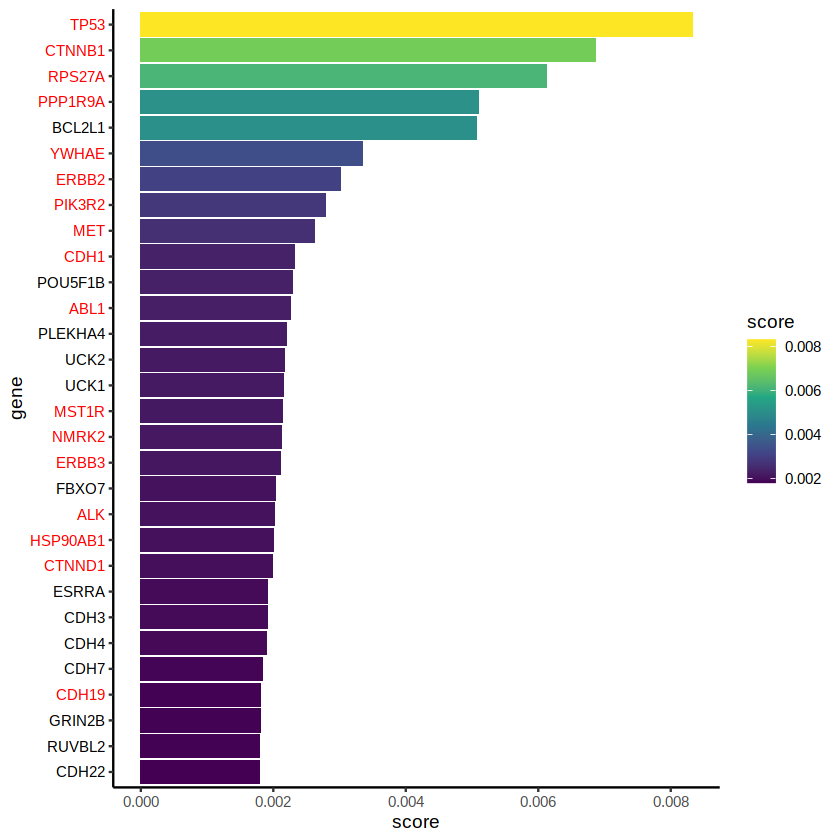

In [42]:
###  plot top30 genes

top30_gene_plot_df <- cp_Gene_prio_df[1:30,]
top30_gene_plot_df$color = "black"
top30_gene_plot_df$color[which(top30_gene_plot_df$gene %in% genes_in_NCG)] = "red"


ggplot(top30_gene_plot_df,aes(x = gene,y = score,fill = score ))+
  geom_bar(stat = "identity")+
  scale_x_discrete(limit = top30_gene_plot_df$gene %>% rev())+coord_flip()+
  theme_classic()+
  scale_fill_viridis_c()+
  theme(axis.text.y = element_text(color = top30_gene_plot_df$color %>% rev()))



## Topological specificity specificity analysis

To assess the functional application of cell-type-specific networks in understanding the context-specific role of genes, we utilized a metric called topological specificity ($topS$), previously introduced by [Mohammadi et al.](https://doi.org/10.1016/j.cels.2019.10.007). This metric allows for the direct quantification of a gene's influence in a network, beyond what is captured by connectivity and strength alone.


In [43]:

############
####  topS 
############

topo.spec <- function(G, sample_no = 10000) {
  d = igraph::degree(G)
  w = igraph::strength(G)  
  
  edge_weights = E(G)$weight
  N = length(edge_weights)
  
  UD = setdiff(sort(unique(d)), 0)
  mean_rand_stat = array(0, max(UD))  
  sd_rand_stat = array(0, max(UD))  
  for(deg in UD){
    rand_samples = sample(edge_weights, sample_no*deg, replace=TRUE);
    start_idx = seq(from=1, to = length(rand_samples), by = deg);
    rand_sums = sapply(start_idx, function(i) {sum(rand_samples[i:(i+deg-1)])})
    
    mean_rand_stat[deg] = mean(rand_sums);
    sd_rand_stat[deg] = sd(rand_sums);    
  }
  
  specificity = sapply( 1:length(w), function(i) {if(w[i] == 0) {x = -Inf;} else {x = (w[i] - mean_rand_stat[d[i]]) / sd_rand_stat[d[i]];}; return(x) } )
  
  specificity[is.na(specificity)] = -Inf
  
  names(specificity) = V(G)$name
  return(specificity)
}

cancer_net_list <- readRDS("/home/liugerui/pro/FGN/SCINET_Network(Imm)/Myeloid_cells_STRING.RDS")  #### run.SCINET.clusters output

cell_types <- names(cancer_net_list)
cell_types

[1] "Mast cells"                   "Langerhans cells"            
 [3] "Kupffer cells"                "Macrophage cells"            
 [5] "Migratory dendritic cells"    "Plasmacytoid dendritic cells"
 [7] "Nonclassical Monocytes"       "Classical Monocytes"         
 [9] "DC2"                          "DC1"                         
[11] "Monocyte-like cells"

In [44]:
cancer_net_list[[1]]

IGRAPH 8e7220b UNW- 3797 77136 -- 
+ attr: name (v/c), specificity (v/n), weight (e/n)
+ edges from 8e7220b (vertex names):
 [1] SAMD11--ASB3      SAMD11--ING5      SAMD11--LDB2      SAMD11--ING2     
 [5] SAMD11--HNRNPH1   SAMD11--ABT1      SAMD11--DMTN      SAMD11--PAX5     
 [9] SAMD11--MCM10     SAMD11--GLRX3     SAMD11--MED19     SAMD11--CHORDC1  
[13] SAMD11--DACH1     SAMD11--BATF      SAMD11--GLRX5     SAMD11--SNRPN    
[17] SAMD11--GCSH      SAMD11--NAA38     SAMD11--SNRPB     NOC2L --MRTO4    
[21] NOC2L --ZNF593    NOC2L --EBNA1BP2  NOC2L --RPS8      NOC2L --RPF1     
[25] NOC2L --RPL5      NOC2L --WDR3      NOC2L --PYHIN1    NOC2L --RRP15    
[29] NOC2L --CEBPZ     NOC2L --MPHOSPH10 NOC2L --POLR1B    NOC2L --DDX18    
+ ... omitted several edges

In [45]:
#### Calculating topS
topS_list <- list()

for(j in 1:length(cell_types)){
  this.cell.type <- cell_types[j]
  this.net <- cancer_net_list[[this.cell.type]]
  test_out <- topo.spec(this.net,sample_no = 10000)
  test_out_df <- data.frame(spec=test_out,gene=names(test_out))
  topS_list[[this.cell.type]] <- test_out_df
}

# saveRDS(topS_list,"/data1/lizekun/CellNetdb/add_analysis/06.topS/TIMEs/Myeloid_cells.rds")


In [46]:
topS_list[[1]] %>% head()

,spec,gene
,<dbl>,<chr>
SAMD11,-3.6297981,SAMD11
NOC2L,0.5994519,NOC2L
PLEKHN1,-0.8267617,PLEKHN1
TNFRSF18,0.5287323,TNFRSF18
TNFRSF4,6.3173078,TNFRSF4
INTS11,0.3733467,INTS11


In [47]:
#### rename
imm_namechange = read.table("/data1/lizekun/CellNetdb/web_version/CellNetdb/data/name_change.txt",sep = "\t",header = T)
cancer_df <- imm_namechange[imm_namechange$cell_type %in% "Myeloid cells",]
names(topS_list) %in% cancer_df$cell_subset %>% table()
names(topS_list) = cancer_df$cell_name[match(names(topS_list),cancer_df$cell_subset)]

names(topS_list)

topS_list_df <- reshape2::melt(topS_list)

head(topS_list_df)

.
TRUE 
  11 

[1] "Mast cells"                   "Langerhans cells"            
 [3] "Kupffer cells"                "Macrophages"                 
 [5] "Migratory dendritic cells"    "Plasmacytoid dendritic cells"
 [7] "Nonclassical monocytes"       "Classical monocytes"         
 [9] "DC2"                          "DC1"                         
[11] "Monocyte-like cells"

Using gene as id variables

Using gene as id variables

Using gene as id variables

Using gene as id variables

Using gene as id variables

Using gene as id variables

Using gene as id variables

Using gene as id variables

Using gene as id variables

Using gene as id variables

Using gene as id variables



,gene,variable,value,L1
,<chr>,<fct>,<dbl>,<chr>
1,SAMD11,spec,-3.6297981,Mast cells
2,NOC2L,spec,0.5994519,Mast cells
3,PLEKHN1,spec,-0.8267617,Mast cells
4,TNFRSF18,spec,0.5287323,Mast cells
5,TNFRSF4,spec,6.3173078,Mast cells
6,INTS11,spec,0.3733467,Mast cells



#### Topological specificity (topS) of known canonical cell-type signature genes.

marker_gene_list  from "Single-Cell Analyses Inform Mechanisms of Myeloid-Targeted Therapies in Colon Cancer" (PMID:32302573) Table S2


In [48]:

marker_gene_list <- readRDS("/data1/lizekun/CellNetdb/add_analysis/06.topS/TIMEs/Myeloid_cells_marker_gene_list.rds")
lapply(marker_gene_list,length) %>% unlist()

all_cell_type <- names(marker_gene_list) %>% sort()
used_cell_type<- all_cell_type[c(1,2,3,6,7,8,10,11)]
used_cell_type

used_color=RColorBrewer::brewer.pal(n=12,name = "Set3")
custom_colors <- used_color[1:length(used_cell_type)]
names(custom_colors) <- used_cell_type

Classical monocytes                          DC1 
                          58                          146 
                         DC2                Kupffer cells 
                          52                            2 
            Langerhans cells                  Macrophages 
                           2                          149 
                  Mast cells    Migratory dendritic cells 
                          44                           40 
         Monocyte-like cells       Nonclassical monocytes 
                          10                           68 
Plasmacytoid dendritic cells 
                          83

[1] "Classical monocytes"          "DC1"                         
[3] "DC2"                          "Macrophages"                 
[5] "Mast cells"                   "Migratory dendritic cells"   
[7] "Nonclassical monocytes"       "Plasmacytoid dendritic cells"

In [49]:
### Figure 3A  plot 

plot_list <- list()

plot_data_list <- list()

for(i in 1:length(used_cell_type)){
  
  this.cell.type <- used_cell_type[i]
  
  used_gene <- marker_gene_list[[this.cell.type]]
  
  plot_data <- topS_list_df[topS_list_df$gene %in% used_gene & topS_list_df$L1 %in% used_cell_type,]
  
  plot_data <- plot_data[plot_data$value > -10,]
  
  text_size=8
  cell_type_plot <- ggplot(plot_data, aes(x = L1 , y = value))+ 
    geom_boxplot(aes(fill = L1),position=position_dodge(0.5),
                 notch=F,outlier.colour=NULL, outlier.shape=16,outlier.size=1.5,width=0.5)+
    labs(title = this.cell.type,y="topS",x=NULL,family = "sans")+
    scale_fill_manual(values = custom_colors)+
    theme_bw() +
    theme(
      # axis.text.x = element_text(size = text_size,angle = 0, hjust = 0.5,vjust =0.5,color = 'black'),
      axis.text.x =element_blank(),
      axis.text.y = element_text(size = text_size,color = 'black'),
      axis.title.y = element_text(size = text_size+1),                     
      axis.title.x = element_text(size = text_size+1),
      # title = element_text(size = 8),
      axis.ticks.x = element_blank(),                     
      #axis.ticks.y = element_blank(),                     
      #legend.key.size = 13,
      legend.position='none',
      # legend.key=element_blank(),
      legend.key.size=unit(0.6,'cm'),
      legend.key.width=unit(0.6,'cm'),
      legend.title=element_blank(),
      legend.text = element_text(size=text_size,colour = 'black', hjust = 0.5, vjust = 0.5),
      plot.title = element_text(hjust = 0.5,size=text_size+2,family = "sans"),       
      panel.grid.major = element_blank(),                 
      panel.grid.minor = element_blank(),                
      plot.background = element_rect(fill = "white",colour = "white"),     
      panel.background = element_rect(fill = "white",colour = "white"),  
      panel.border = element_rect(fill="transparent",colour  ="black")                    
    )
  
  plot_list[[this.cell.type]] <- cell_type_plot
  plot_data_list[[this.cell.type]] <- plot_data
  
}


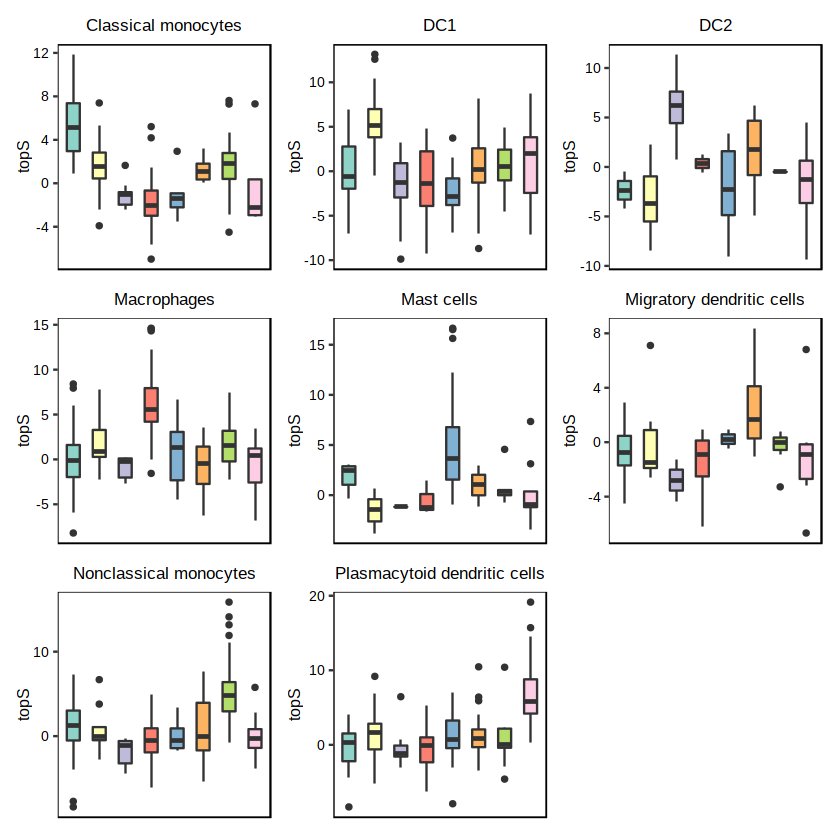

In [50]:
p=plot_list[[1]]+plot_list[[2]]+plot_list[[3]]+plot_list[[4]]+plot_list[[5]]+plot_list[[6]]+plot_list[[7]]+plot_list[[8]]
p+plot_layout(ncol = 3)



## Transcriptional specificity analysis

#### Transcriptional specificity of genes pertains to their degree of specificity in expression within a particular cell type.


In [51]:
############
####  tranS
############
####  use the exp profile after  imputation and batch correction

ace <- readRDS("/data1/lizekun/CellNetdb/add_analysis/07.tranS/0.adj_ace/TIME/Myeloid_cells/Myeloid_cell.rds")   ### after runing compute.cluster.feature.specificity  

ace

class: ACTIONetExperiment 
dim: 31863 161528 
metadata(1): backbone
assays(2): counts logcounts
rownames(31863): AL627309.5 LINC01409 ... WI2-87327B8.2 CH507-9B2.8
rowData names(1): feature_name
colnames(161528): filter_10x_object1_AAACGGGGTTACAGAA-1_1
  filter_10x_object1_AACCATGAGTGACATA-1_1 ... TTTGCGCCACTGTTAG-58
  TTTGCGCGTAAACGCG-58
colData names(5): sample_name batch_attr assigned_archetype
  node_centrality clusters
rowMaps(2): unified_feature_specificity cluster_specificity_scores_feature_specificity
colMaps(6): MNN ACTIONred ACTIONet2D ACTIONet3D denovo_color archetype_footprint
rowNets(0): 
colNets(1): ACTIONet

In [52]:
metadata=colData(ace) %>%data.frame() 
head(metadata)

,sample_name,batch_attr,assigned_archetype,node_centrality,clusters
,<chr>,<chr>,<dbl>,<dbl>,<chr>
filter_10x_object1_AAACGGGGTTACAGAA-1_1,sam_1,filter,2,4.375292,Macrophage cells
filter_10x_object1_AACCATGAGTGACATA-1_1,sam_2,filter,3,2.786788,Macrophage cells
filter_10x_object1_AACCGCGGTACGACCC-1_1,sam_3,filter,14,2.345610,Migratory dendritic cells
filter_10x_object1_AACCGCGGTCTAAAGA-1_1,sam_4,filter,14,2.132372,Migratory dendritic cells
filter_10x_object1_AACTCAGCATTACGAC-1_1,sam_5,filter,12,4.597063,Macrophage cells
filter_10x_object1_AACTCTTTCGCAAGCC-1_1,sam_6,filter,12,4.378155,Macrophage cells


In [53]:
NETgene_list <- readRDS("/data1/lizekun/CellNetdb/web_version/CellNetdb/data/immnet_geneList.rds")   #### gene list of each cell-type-specific network
cancer_net <- names(NETgene_list)[str_detect(string = names(NETgene_list),pattern = "Myeloid_cells")]
cancer_net <- cancer_net[grep("STRING",cancer_net)]

In [54]:
cancer_net_list <- NETgene_list[cancer_net]
lapply(cancer_net_list,length) %>% unlist()

Myeloid_cells_STRING_Classical Monocytes 
                                             2863 
                         Myeloid_cells_STRING_DC1 
                                             1781 
                         Myeloid_cells_STRING_DC2 
                                             1576 
               Myeloid_cells_STRING_Kupffer cells 
                                              785 
            Myeloid_cells_STRING_Langerhans cells 
                                             1240 
            Myeloid_cells_STRING_Macrophage cells 
                                             3333 
                  Myeloid_cells_STRING_Mast cells 
                                             3797 
   Myeloid_cells_STRING_Migratory dendritic cells 
                                             2407 
         Myeloid_cells_STRING_Monocyte-like cells 
                                             1902 
      Myeloid_cells_STRING_Nonclassical Monocytes 
                                             1747 
Myeloid_cells_STRING_Plasmacytoid dendritic cells 
                                             4284

In [55]:
### gene expression imputation 
impute.genes.using.archetypes <- function(ace, genes, features_use = NULL) {
  
  Z <- rowMaps(ace)[["unified_feature_profile"]][features_use, ]
  
  H <- Matrix::t(colMaps(ace)[["H_unified"]])
  
  expression_imputed <- Z %*% H
  
  return(expression_imputed)
}


In [56]:
####  Calculating tranS

transc.spec.celltype <- function(Arch.imputed.profile, Labels,this.celltype) {
  
  gene_names = rownames(Arch.imputed.profile)
  
  if(!is.factor(Labels)){
    Labels = factor(Labels, levels = sort(unique(Labels)))
  }
  
  UL = levels(Labels)
  
  celltype <- this.celltype
  
  transcriptional.gene.specificity.Z = array(0, dim = c(length(gene_names), 1))
  rownames(transcriptional.gene.specificity.Z) = gene_names
  colnames(transcriptional.gene.specificity.Z) = celltype
  
  
  R.utils::printf('%s\n', celltype)
  
  Group = which(Labels %in% celltype)
  Null = which(!(Labels %in% celltype))
  
  A_group = Arch.imputed.profile[, Group] %>% as.matrix()
  A_null = Arch.imputed.profile[, Null]   %>% as.matrix()
  
  delta_mean = rowMeans(A_group) - rowMeans(A_null);
  sigma1_sq = apply(A_group, 1, var)
  sigma2_sq = apply(A_null, 1, var)
  sigma_pooled = sqrt( (sigma1_sq / length(Group)) + (sigma2_sq / length(Null)) )
  z.stat = delta_mean / sigma_pooled
  
  transcriptional.gene.specificity.Z[, celltype] = z.stat
  
  
  return(transcriptional.gene.specificity.Z)
}


In [57]:
## run 

tranS_list <- list()

for(i in 1:length(cancer_net_list)){
  
  this.cell_type <- names(cancer_net_list)[i]  %>% gsub(pattern = "Myeloid_cells_STRING_",replacement = "")
  
  net_gene <- cancer_net_list[[i]] %>% names()
  net_gene <- intersect(net_gene,rownames(ace))
  
  expression_imputed <- impute.genes.using.archetypes(ace = ace,features_use = net_gene)
  
  tranS <- transc.spec.celltype(Arch.imputed.profile = expression_imputed ,Labels = as.character(metadata$cluster),this.celltype=this.cell_type  )
  
  tranS_list[[this.cell_type]] <- tranS
  # saveRDS(tranS,paste0("/data1/lizekun/CellNetdb/add_analysis/07.tranS/2.tranS_output/TIME/Myeloid_cells_adj_count/tranS/",this.cell_type,".rds"))
  
  message(i)
  
}


Classical Monocytes


1



DC1


2



DC2


3



Kupffer cells


4



Langerhans cells


5



Macrophage cells


6



Mast cells


7



Migratory dendritic cells


8



Monocyte-like cells


9



Nonclassical Monocytes


10



Plasmacytoid dendritic cells


11




#### Comparison of topological specificity and transcriptional specificity scores in myeloid cells of pan-tumor TIMEs.


In [58]:
####################### 
### merge topS and tranS  
####################### 

imm_namechange = read.table("/data1/lizekun/CellNetdb/web_version/CellNetdb/data/name_change.txt",sep = "\t",header = T)
cancer_df <- imm_namechange[imm_namechange$cell_type %in% "Myeloid cells",]

topS_tranS_list <- list()
tranS_topS_plot_list <- list()
rank_plot_list <- list()
top500_topS_df_list <- list()

all_cell_type <- names(cancer_net_list)  %>% gsub(pattern = "Myeloid_cells_STRING_",replacement = "")
corr_df <- data.frame(cell_type = all_cell_type,Pearson_corr=NA,Pearson_pvalue=NA,Spearman_corr=NA,Spearman_pvalue=NA)


In [59]:

for(i in 1:11){
  
  this.cell.type <- all_cell_type[i]
  this.cell.type.adj <- cancer_df$cell_name[match(this.cell.type,cancer_df$cell_subset)]
  
  tranS_df <- tranS_list[[this.cell.type]]
  
  tranS_df_filter <- data.frame(gene=rownames(tranS_df),tranS=as.numeric(tranS_df[,this.cell.type]))
  
  topS_df <- topS_list[[this.cell.type.adj]]
  colnames(topS_df)[1] <- "topS"
  
  int_df <- merge(tranS_df_filter,topS_df,by = "gene",all = F)
  
  topS_tranS_list[[this.cell.type.adj]] <- int_df
  
  genes.all <- int_df$gene
  ribo.genes <-  genes.all[grep('^RPS[0-9]*|^RPL[0-9]*', genes.all)]
  mito.genes <- genes.all[grep('^MRPS[0-9]*|^MRPL[0-9]*', genes.all)]
  nduf.genes <- genes.all[grep('^NDUF', genes.all)]
  bad.genes <- c(ribo.genes, mito.genes, nduf.genes)
  int_df_filter <- int_df[!int_df$gene %in% bad.genes,]
  
  int_df_filter$topS_PR <- percent_rank(int_df_filter$topS)
  int_df_filter$tranS_PR <- percent_rank(int_df_filter$tranS)
  
  top500_topS_df <- int_df_filter[order(int_df_filter$topS,decreasing = T),]
  top500_topS_df <- top500_topS_df[1:500,]
  top500_topS_df$log2_FC <- log2(top500_topS_df$topS_PR/top500_topS_df$tranS_PR)
  top500_topS_df$topS_rank <- rep(1:500)
  
  ###show top 5 genes 
  
  top_ranked_5genes <- top500_topS_df$gene[order(top500_topS_df$log2_FC,decreasing = T)] %>% head(5)
  
  top500_topS_df$gene_labels <- NA
  top500_topS_df$gene_labels[match(top_ranked_5genes,top500_topS_df$gene)] <- top_ranked_5genes
  top500_topS_df$color_labels <- "black"
  top500_topS_df$color_labels[top500_topS_df$gene %in% top_ranked_5genes] <- "red"
  
  top500_topS_df_list[[this.cell.type.adj]] <- top500_topS_df
  
  text_size=6
  
  spearman_out <- cor.test(int_df_filter$tranS,int_df_filter$topS,method = "spearman")
  pearson_out <- cor.test(int_df_filter$tranS,int_df_filter$topS,method = "pearson")
  
  corr_df$Pearson_corr[i] <- pearson_out$estimate
  corr_df$Pearson_pvalue[i] <- pearson_out$p.value
  corr_df$Spearman_corr[i] <- spearman_out$estimate
  corr_df$Spearman_pvalue[i] <- spearman_out$p.value
  
  
  p_corr <- ggplot(int_df_filter, aes(x = tranS, y = topS)) +
    geom_point(size=0.7) +
    labs(title  = this.cell.type.adj,family = "sans")+
    geom_smooth(method = "lm", se = FALSE)+
    theme_bw() +
    stat_cor(data=int_df_filter, method = "pearson", label.sep='\n')+
    theme(axis.text.x = element_text(size = text_size,angle = 0, hjust = 0.5,vjust =0.5,color = 'black'),
          axis.text.y = element_text(size = text_size,color = 'black'),
          axis.title.y = element_text(size = text_size+1),                     
          axis.title.x = element_text(size = text_size+1),
          # title = element_text(size = 8),
          #axis.ticks.x = element_blank(),                     
          #axis.ticks.y = element_blank(),                     
          #legend.key.size = 13,
          #legend.position='none',
          # legend.key=element_blank(),
          legend.key.size=unit(1,'cm'),
          legend.key.width=unit(1,'cm'),
          legend.title=element_blank(),
          legend.text = element_text(size=5,colour = 'black', hjust = 0.5, vjust = 0.5, family = "sans"),
          plot.title = element_text(hjust = 0.5,size=text_size+2,family = "sans"), 
          panel.grid.major = element_blank(),                 
          panel.grid.minor = element_blank(),                
          plot.background = element_rect(fill = "white",colour = "white"),     
          panel.background = element_rect(fill = "white",colour = "white"),  
          panel.border = element_rect(fill="transparent",colour  ="black")                    
    )
  
  tranS_topS_plot_list[[this.cell.type.adj]] <- p_corr
  
  
  ###  rank 
  gene_label_size=1.5
  
  p2 <- ggplot(top500_topS_df, aes(x = topS_rank, y = log2_FC,color=color_labels)) +
    geom_point(size=0.5) +
    geom_text(aes(label = gene_labels),family = "sans", size = gene_label_size, hjust = 1.2,vjust =0.5)+
    scale_color_manual(values = c("red" = "red","black" = "black"))+
    labs(title  = this.cell.type,y="PR LFC (topS/tranS)",x="top 500 topS genes",family = "sans")+
    geom_smooth(method = "lm", se = FALSE,color = "blue")+
    scale_x_reverse()+
    theme_bw() +
    theme(axis.text.x = element_text(size = text_size,angle = 0, hjust = 0.5,vjust =0.5,color = 'black'),
          axis.text.y = element_text(size = text_size,color = 'black'),
          axis.title.y = element_text(size = text_size+1),                     
          axis.title.x = element_text(size = text_size+1),
          # title = element_text(size = 8),
          #axis.ticks.x = element_blank(),                     
          #axis.ticks.y = element_blank(),                     
          #legend.key.size = 13,
          legend.position='none',
          # # legend.key=element_blank(),
          # legend.key.size=unit(1,'cm'),
          # legend.key.width=unit(1,'cm'),
          # legend.title=element_blank(),
          # legend.text = element_text(size=8,colour = 'black', hjust = 0.5, vjust = 0.5),
          plot.title = element_text(hjust = 0.5,size=text_size+2,family = "sans"),       
          panel.grid.major = element_blank(),                 
          panel.grid.minor = element_blank(),                
          plot.background = element_rect(fill = "white",colour = "white"),     
          panel.background = element_rect(fill = "white",colour = "white"),  
          panel.border = element_rect(fill="transparent",colour  ="black")                    
    )
  
  rank_plot_list[[this.cell.type.adj]] <- p2
  
  
  message(i)
}


1

2

3

4

5

6

7

8

9

10

11



`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



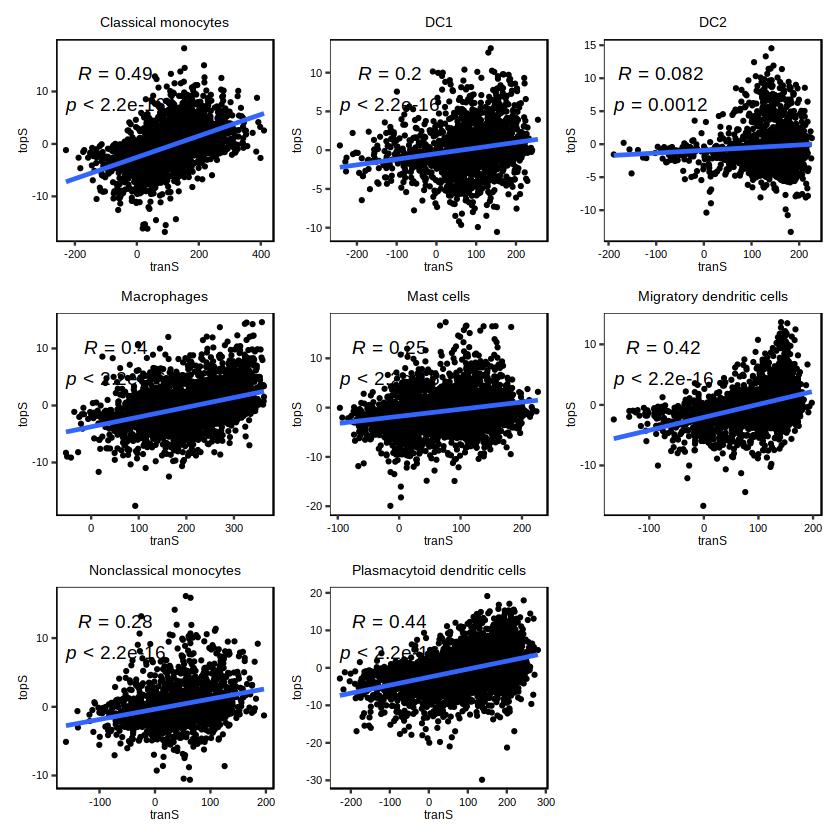

In [60]:
p1=tranS_topS_plot_list[[1]]+tranS_topS_plot_list[[2]]+tranS_topS_plot_list[[3]]+tranS_topS_plot_list[[6]]+tranS_topS_plot_list[[7]]+tranS_topS_plot_list[[8]]+tranS_topS_plot_list[[10]]+tranS_topS_plot_list[[11]]
p1+plot_layout(ncol = 3)



#### Identify genes exhibited high topS scores but low tranS scores for each cell subset


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



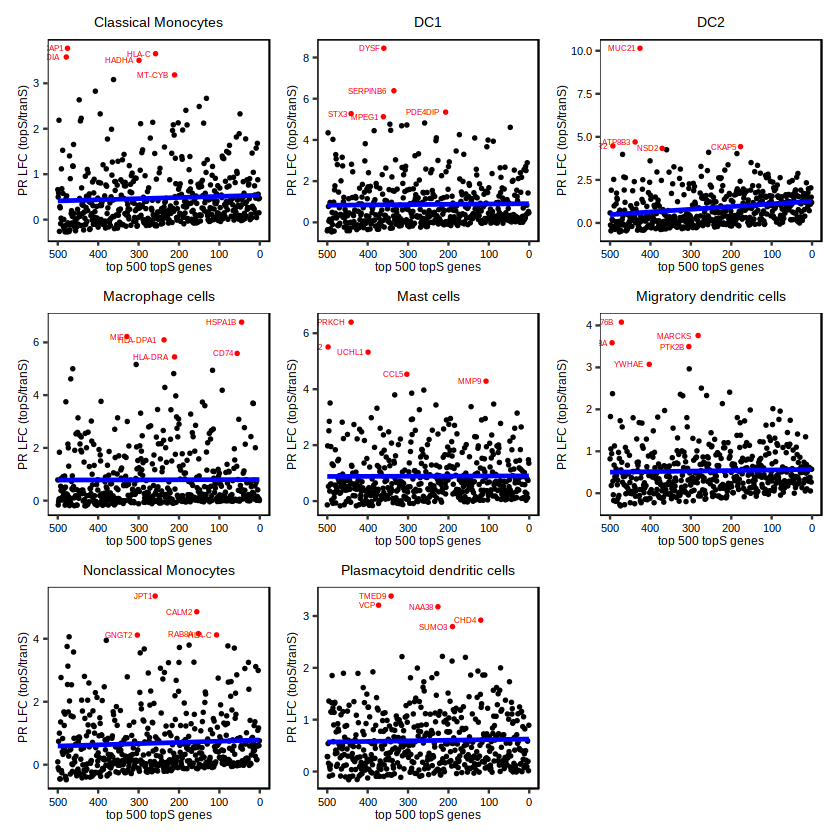

In [61]:
p2=rank_plot_list[[1]]+rank_plot_list[[2]]+rank_plot_list[[3]]+rank_plot_list[[6]]+rank_plot_list[[7]]+rank_plot_list[[8]]+rank_plot_list[[10]]+rank_plot_list[[11]]
p2+plot_layout(ncol = 3)


#### Calculating the jaccard index between the top 500 genes for each cell subset based on their topS and tranS scores.


In [62]:
####  top 500 topS genes and top 500 tranS genes  | jaccard_index
topS_tranS_list[[1]] %>% head()

all_cell_type <- names(topS_tranS_list)

jaccard_index_df <- data.frame(cell_type=all_cell_type,jaccard_index=NA,shared_nodes=NA)

for(i in 1:length(all_cell_type)){
  
  this.cell.type <- all_cell_type[i]
  this.cell_df <- topS_tranS_list[[this.cell.type]]
  
  
  genes.all <- this.cell_df$gene
  ribo.genes <-  genes.all[grep('^RPS[0-9]*|^RPL[0-9]*', genes.all)]
  mito.genes <- genes.all[grep('^MRPS[0-9]*|^MRPL[0-9]*', genes.all)]
  nduf.genes <- genes.all[grep('^NDUF', genes.all)]
  bad.genes <- c(ribo.genes, mito.genes, nduf.genes)
  this.cell_df_filter <- this.cell_df[!this.cell_df$gene %in% bad.genes,]
  
  top_topS_genes <- this.cell_df_filter$gene[order(this.cell_df_filter$topS,decreasing = T)][1:500]
  top_tranS_genes <- this.cell_df_filter$gene[order(this.cell_df_filter$tranS,decreasing = T)][1:500]
  
  shared_genes <- intersect(top_topS_genes,top_tranS_genes) %>% unique()
  pool_genes <- c(top_topS_genes,top_tranS_genes) %>% unique()
  
  jaccard_index <- length(shared_genes)/length(pool_genes)
  
  jaccard_index_df$jaccard_index[i] <- jaccard_index
  jaccard_index_df$shared_nodes[i] <- shared_genes %>% length()
  
}


,gene,tranS,topS
,<chr>,<dbl>,<dbl>
1,ABAT,82.959124,-1.4754714
2,ABCA7,82.174263,-0.7678116
3,ABCB7,-14.030954,-3.6635399
4,ABCC1,-4.948728,-2.2439250
5,ABCC6,91.025057,-2.4711812
6,ABHD13,100.668862,0.7946484


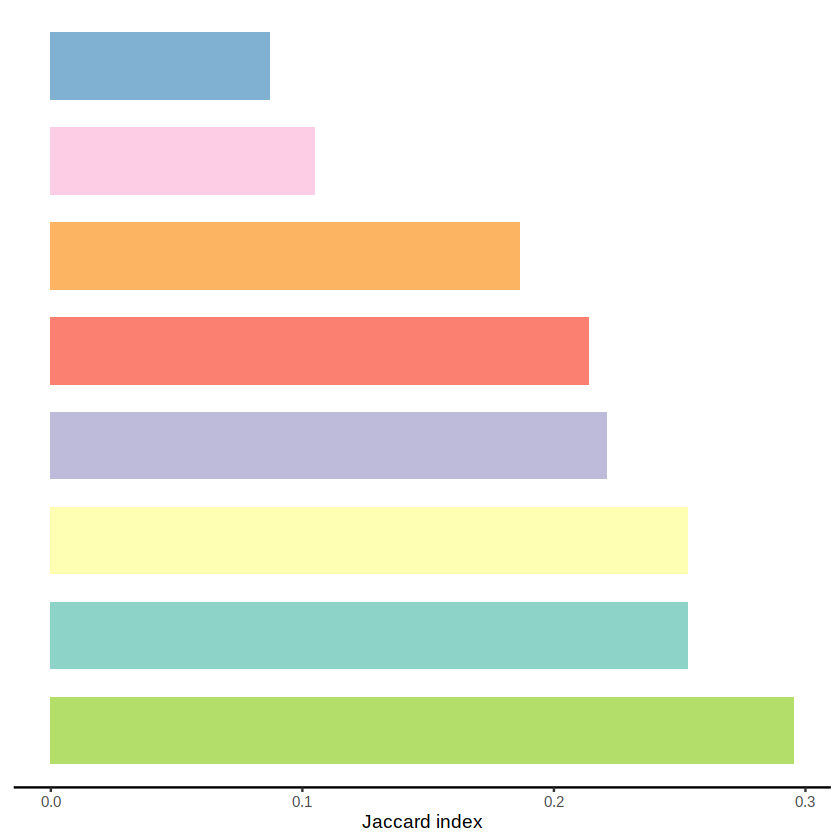

In [63]:
jaccard_index_df_f <- jaccard_index_df[c(1,2,3,6,7,8,10,11),]
rownames(jaccard_index_df_f) <- rep(1:nrow(jaccard_index_df_f))

used_color=RColorBrewer::brewer.pal(n=12,name = "Set3")
custom_colors <- used_color[1:nrow(jaccard_index_df_f)]

jaccard_index_df_f$color <- custom_colors

###  barplot
adj_order_rowname <- jaccard_index_df_f$cell_type[order(jaccard_index_df_f$jaccard_index,decreasing = T)]


color1 <- "#83AF9B"
text_size=8
bar_p <- ggplot(jaccard_index_df_f)  + 
  geom_bar(aes(x= factor(cell_type,levels = adj_order_rowname), y=jaccard_index),stat="identity", fill=jaccard_index_df_f$color,width = 0.7,position = position_dodge(width = 0.2))+
  labs(x=NULL,y="Jaccard index",title=NULL,family = "Arial",size = 6)+ 
  theme_bw() +
  theme(plot.title = element_text(hjust = 0,size=text_size),
        axis.title.y = element_text(size = text_size+1),
        axis.text.y =  element_blank(),
        axis.line.x = element_line(),
        axis.line.y = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        plot.background = element_rect(fill = "white"),
        panel.border = element_blank(),
        axis.ticks.y = element_blank())+
  coord_flip()+
  scale_x_discrete(labels = adj_order_rowname)  
bar_p


## Network connectivity analysis

#### We selected the top 500 prognostic genes for each tumor type by analyzing TCGA data.


In [64]:

clinical_data <- data.table::fread(paste0("/data1/lizekun/TCGA/clinical_info/all_survival/","STAD",".txt"),
                                   sep = "\t",header = T)
cancer_fpkm_data <- readRDS(paste0("/data1/lizekun/Promoter/00.pre/TCGA/FPKM/0.all_samples/","STAD",".rds"))

cancer_fpkm_sample_df <- data.frame(raw_sample_id=colnames(cancer_fpkm_data))
cancer_fpkm_sample_df$sub_id <- substr(cancer_fpkm_sample_df$raw_sample_id,1,12)
cancer_fpkm_sample_df$label1 <- substr(cancer_fpkm_sample_df$raw_sample_id,14,15)
table(cancer_fpkm_sample_df$label1)
cancer_fpkm_sample_df <- cancer_fpkm_sample_df[!cancer_fpkm_sample_df$label1 %in% "11",]

int_used_sample <- intersect(clinical_data$submitter_id,cancer_fpkm_sample_df$sub_id)
clinical_data <- clinical_data[clinical_data$submitter_id %in% int_used_sample,]
cancer_fpkm_sample_df <- cancer_fpkm_sample_df[match(int_used_sample,cancer_fpkm_sample_df$sub_id),]
identical(clinical_data$submitter_id,cancer_fpkm_sample_df$sub_id)

cancer_fpkm_data <- cancer_fpkm_data[,cancer_fpkm_sample_df$raw_sample_id]


 01  11 
412  36 

[1] TRUE

In [65]:
### Keep only the genes with FPKM greater than 1 in at least half of the tumor samples
used_cancer_index <- c()
for(j in 1:nrow(cancer_fpkm_data)){
  gene_used <- rownames(cancer_fpkm_data)[j]
  
  gene_exp <- cancer_fpkm_data[j,] %>%as.numeric()
  
  half_sample_size <- nrow(clinical_data)/2
  if(length(which(gene_exp > 1)) > half_sample_size){
    used_cancer_index <- c(used_cancer_index,j)
  }
  # message(j)
}

In [66]:
used_cancer_gene_id <- rownames(cancer_fpkm_data)[used_cancer_index]

id_tran_df <- read.table("/data1/lizekun/Promoter/txt/FPKM_gene_tran_df.txt",sep = "\t",header = T)

all_gene_df <- read.table(paste0("/home/lizekun/projects/CellNetdb_analysis/Connectivity/Connectivity_STRING/deconvolute_prognostic_gene/0.prognostic_gene/my_prognostic_gene/1.fpkm/1.raw/","STAD",".txt"),sep = "\t",header = T)
all_gene_df$gene_symbol <- id_tran_df$gene_name[match(all_gene_df$gene,id_tran_df$gene_id)]

filter_gene_df <- all_gene_df[all_gene_df$gene %in% used_cancer_gene_id ,]

filter_gene_df <- filter_gene_df[order(filter_gene_df$P,decreasing = F),]
prognostic_gene_df <- filter_gene_df[1:500,]


#### Calculating the normalized within-group connectivity of these prognostic genes.

In [67]:

network_edge_list_STRING <- readRDS("/data1/lizekun/CellNetdb/add_analysis/00.pre/network_edge_list.rds")

solid_network_dir_df <- data.table::fread("/data1/lizekun/CellNetdb/add_analysis/txt/all_solid_cancer.txt",sep = "\t",header = T) %>% data.frame()
solid_network_dir_df$adj_cancer_type <- solid_network_dir_df$cancer_type %>% gsub(pattern = " ",replacement = '_')
solid_network_dir_df$net_name <- solid_network_dir_df$rds %>% gsub(pattern = ".RDS",replacement = '')

cal.connectivity <- function(network.edge.list = NULL, geneset = NULL){
  
  node.list <- lapply(network.edge.list, function(net){
    genes.all <- unique(c(as.character(net[,1]),as.character(net[,2])))
  })
  names(node.list) <- names(network.edge.list)
  
  connectivity.sig <- lapply(network.edge.list,function(net){
    nrow(net[(net[,1] %in% geneset & net[,2] %in% geneset), ])
  })
  
  connectivity.sig.all <- as.data.frame(dplyr::bind_rows(connectivity.sig))
  df <- t(connectivity.sig.all)
  data <- as.data.frame(df)
  colnames(data) <- 'connectivity'
  
  data$signature_gene_num <- rep(length(geneset), nrow(data))
  
  sig.f <- lapply(node.list, function(node){length(geneset[geneset %in% node])})
  
  data$detected.sig.num <- unlist(sig.f)
  
  return(data)
  
}


In [68]:
this.cancer_df <- solid_network_dir_df[solid_network_dir_df$adj_cancer_type %in% "Gastric_cancer",]
output_df <- cal.connectivity(network_edge_list_STRING[this.cancer_df$net_name],prognostic_gene_df$gene_symbol)
output_df$connectivity.normalized <- output_df$connectivity / output_df$detected.sig.num  
output_df$cancer <- this.cancer_df$cancer_type
output_df$cell_type <- this.cancer_df$cell_type

In [69]:
output_df

,connectivity,signature_gene_num,detected.sig.num,connectivity.normalized,cancer,cell_type
,<int>,<int>,<int>,<dbl>,<chr>,<chr>
Gastric_cancer_STRING_B cells,71,500,106,0.66981132,Gastric cancer,B cells
Gastric_cancer_STRING_CD4+ T cells,55,500,95,0.57894737,Gastric cancer,CD4+ T cells
Gastric_cancer_STRING_CD8+ T cells,16,500,57,0.28070175,Gastric cancer,CD8+ T cells
Gastric_cancer_STRING_Cycling cells,68,500,68,1.00000000,Gastric cancer,Cycling cells
Gastric_cancer_STRING_Endothelial cells,128,500,151,0.84768212,Gastric cancer,Endothelial cells
Gastric_cancer_STRING_Epithelial cells(malignant),53,500,104,0.50961538,Gastric cancer,Epithelial cells (malignant)
Gastric_cancer_STRING_Erythrocytes,13,500,34,0.38235294,Gastric cancer,Erythrocytes
Gastric_cancer_STRING_Fibroblasts,98,500,128,0.76562500,Gastric cancer,Fibroblasts
Gastric_cancer_STRING_Mast cells,8,500,50,0.16000000,Gastric cancer,Mast cells



#### We established a null model by randomly selecting 10,000 gene sets, each consisting of the same number of genes as the prognostic genes. 

#### The statistical significance was determined by evaluating the rank of the observed within-group connectivity within the null distribution.


In [70]:

sig.Connectivity <- function(network = NULL, geneset = NULL, simulate.num = 10000){
  
  network.graph <- igraph::graph_from_data_frame(network)
  degree.centrality <- igraph::degree(network.graph)
  
  detected.genes <- geneset[geneset %in% names(degree.centrality)]
  
  pb = txtProgressBar(min = 0, max = simulate.num, style = 3)
  
  connectivity.random <- vector()
  for (n in 1:simulate.num){
    Sys.sleep(0.05)
    setTxtProgressBar(pb,n)
    
    random.geneset <- vector()
    selected <- vector()
    for (i in seq_along(detected.genes)){
      gene <- detected.genes[i]
      gene.degree <- degree.centrality[gene]
      degree.centrality.f <- degree.centrality[!(names(degree.centrality) %in% selected)]
      degree.range <- c(floor(0.8 * gene.degree), ceiling(1.2 * gene.degree))
      node.pool <- degree.centrality.f[degree.range[1] <= degree.centrality.f & degree.centrality.f <= degree.range[2]]
      
      if (length(node.pool) == 0){
        break
      }
      
      gene.random <- sample(names(node.pool), 1)
      
      random.geneset[i] <- gene.random
      selected[i] <- gene.random
    }
    
    connectivity.random.n <- nrow(network[(network[,1] %in% random.geneset & network[,2] %in% random.geneset), ])
    connectivity.random[n] <- connectivity.random.n
  }
  close(pb)
  
  
  connectivity <- nrow(network[(network[,1] %in% geneset & network[,2] %in% geneset), ])
  connectivity.final <- c(connectivity.random, connectivity)
  pvalue <- rank(-(connectivity.final),ties.method = 'last')[simulate.num + 1] / simulate.num
  
  output.list <- list(null.distribution = connectivity.random, p.value = pvalue, detected.geneset = detected.genes, observed = connectivity)
  
  return(output.list)
}

this.net.name <- this.cancer_df$net_name[8]
this.net.name

[1] "Gastric_cancer_STRING_Fibroblasts"

In [71]:
this.net_out <- sig.Connectivity(network = network_edge_list_STRING[[this.net.name]],geneset = prognostic_gene_df$gene_symbol)



## Network similarity evaluation

#### Two distinct metrics: shared-edge similarity and topology similarity


In [72]:


my.cor.test_spearman <- function(...) {
  obj<- try(cor.test(...,method="spearman"), silent=TRUE)
  if (is(obj, "try-error"))  return(c(NA,NA)) else return(obj[c("estimate","p.value")])
}



Initially, shared nodes were identified between any pair of networks. To evaluate the topology similarity, the Spearman correlation coefficient was computed for the transformed topological specificity ($topS_{transf}$) across all shared nodes.The transformation function used for $topS_{transf}$ was defined as:

$$
\normalsize   topS_{transf}(i) =\frac{1}{1+e^{-topS(i)}}
$$


In [73]:
#### Topology  Similarity |demo


get_node_specificity_sim <- function(net1_name,net2_name,cor_method){
  
  net_ig1 = readRDS(paste0("/data1/lizekun/CellNetdb/web_version/CellNetdb/data/new_Network/",net1_name,".RDS"))
  net_ig2 = readRDS(paste0("/data1/lizekun/CellNetdb/web_version/CellNetdb/data/new_Network/",net2_name,".RDS"))
  
  
  net1 = net_ig1$node
  net2 = net_ig2$node
  
  shared_node = intersect(net1$gene,net2$gene)
  
  net1_f = net1[match(shared_node,net1$gene),]
  
  net2_f = net2[match(shared_node,net2$gene),]
  
  return( cor(net1_f$specificity,net2_f$specificity,method = cor_method) )
  
}



Topology_out <- get_node_specificity_sim("Gastric_cancer_STRING_Epithelial cells(malignant)",
                                         "Colorectal_cancer_STRING_Epithelial cells(malignant)",
                                         cor_method="spearman")

Topology_out

[1] 0.5377097


To quantify the shared-edge similarity, the edges connecting these nodes were extracted from both networks, resulting in the creation of subgraphs for each network. The shared-edge similarity was subsequently determined by calculating the Spearman correlation coefficient between the weights assigned to the shared edges in the respective subgraphs of both networks.


In [74]:
####   Shared-edge  Similarity    |demo

get_net_df <- function(the.net_name){
  

  net_ig = readRDS( paste0("/data1/lizekun/CellNetdb/web_version/CellNetdb/data/new_Network/",the.net_name,".RDS"))
  
  the.net = net_ig$net
  the.node =net_ig$node
  
  
  the.net_df = reshape2::melt(the.net)
  the.net_df = the.net_df[which(the.net_df$value != 0),]
  
  the.net_df$Var1 = the.net_df$Var1 %>% as.character()
  the.net_df$Var2 = the.net_df$Var2 %>% as.character()
  
  the.net_df$gene1ID = the.net_df$Var1 > the.net_df$Var2
  the.net_df$gene1ID = the.net_df$gene1ID + 1
  
  the.net_df$gene2ID = the.net_df$Var1 < the.net_df$Var2
  the.net_df$gene2ID = the.net_df$gene2ID + 1
  
  the.net_df$edge = ""
  for(j in 1:nrow(the.net_df)){
    
    gene1 = the.net_df[ j , the.net_df$gene1ID[j] ]
    gene2 = the.net_df[ j , the.net_df$gene2ID[j] ]
    the.net_df$edge[j] = paste(gene1,gene2,sep = "_")
    
  }
  return(the.net_df)

}


get_Shared_edge_sim <- function(net1_name,net2_name){
  
  net1 <- get_net_df(net1_name)
  net2 <- get_net_df(net2_name)
  
  net1_gene <- c(net1$Var1,net1$Var2) %>% unique()
  net2_gene <- c(net2$Var1,net2$Var2) %>% unique()
  
  int_gene <- intersect(net1_gene,net2_gene)
  
  sub_net1 <- net1[net1$Var1 %in% int_gene & net1$Var2 %in% int_gene,]
  sub_net2 <- net2[net2$Var1 %in% int_gene & net2$Var2 %in% int_gene,]
  
  shared_edge <- intersect(sub_net1$edge,sub_net2$edge)
    
  adj_sub_net1 <- sub_net1[match(shared_edge,sub_net1$edge),]
  adj_sub_net2 <- sub_net2[match(shared_edge,sub_net2$edge),]
    
  corr_out <- my.cor.test_spearman(adj_sub_net1$value %>%as.numeric(),adj_sub_net2$value %>%as.numeric())
    
  return(corr_out)
    


}



In [75]:
Shared_edge_out <- get_Shared_edge_sim("Gastric_cancer_STRING_Epithelial cells(malignant)",
                                       "Colorectal_cancer_STRING_Epithelial cells(malignant)")

Shared_edge_out

$estimate
      rho 
0.4669412 

$p.value
[1] 0


## Network performance evaluation

We evaluated the performance of various malignant cell networks generated by four reference networks in terms of their capacity to recover DisGeNET disease genes associated with specific tumor type. In this part, we utilized two network performance metrics, which were previously defined by [Huang et al.](https://doi.org/10.1016/j.cels.2018.03.001).


In [1]:

###   the ability of Malignant cell networks from four reference networks  recover DisGeNet genes

from network_evaluation_tools import data_import_tools as dit
from network_evaluation_tools import network_evaluation_functions as nef
from network_evaluation_tools import network_propagation as prop
import pandas as pd
import numpy as np


#### Load network edge data for malignant cell type-specific network of uveal melanom


In [2]:
cancer_type="Uveal_melanoma"
network_id="STRING"

wd="/home/lizekun/projects/CellNetdb_analysis/Network_Evaluation/my_refnet/07.DisGeNET_disease_gene/01.malignant_net_edge/"
network = dit.load_network_file(wd+cancer_type+"_"+network_id+".txt", verbose=True)

Network File Loaded: /home/lizekun/projects/CellNetdb_analysis/Network_Evaluation/my_refnet/07.DisGeNET_disease_gene/01.malignant_net_edge/Uveal_melanoma_STRING.txt


In [3]:
network


#### Load DisGeNET gene set associated with uveal melanoma


In [4]:
gene_set_path="/home/lizekun/projects/CellNetdb_analysis/Network_Evaluation/my_refnet/07.DisGeNET_disease_gene/00.DisGeNET_cancer_paired_geneset/"

f = open(gene_set_path+cancer_type+".txt")
node_set_lines = f.read().splitlines()
f.close()
genesets = {node_set_lines[0]:set(node_set_lines[1:])}

In [5]:
# Calculate geneset sub-sample rate
genesets_p = nef.calculate_p(network, genesets)

In [6]:
genesets

In [7]:
# Determine optimal alpha for network 
alpha = prop.calculate_alpha(network)
print 'alpha',alpha

alpha 0.611


In [8]:
# Calculate network kernel for propagation
kernel = nef.construct_prop_kernel(network, alpha=alpha, verbose=True)


Alpha: 0.611
Network Propagation Complete: 4.791025877 seconds
Propagated network kernel constructed


In [9]:
kernel

,RNF14,SSPN,NYX,RNF17,FHIT,HSPA2,NELFE,CS,PCSK9,MZT2A,...,C1orf74,C22orf23,STEAP1,STEAP1B,UFSP1,VAX2,LCN15,ALKBH2,TEX9,CCDC148
RNF14,0.393221,0.000008,0.000070,0.000054,0.000164,0.000446,0.000074,0.000090,0.000152,0.000004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SSPN,0.000018,0.407137,0.000105,0.000014,0.000041,0.000329,0.000043,0.000040,0.000034,0.000002,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NYX,0.000013,0.000009,0.394859,0.000061,0.000021,0.000537,0.000077,0.000054,0.000111,0.000002,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RNF17,0.000019,0.000002,0.000111,0.392151,0.000025,0.000730,0.000083,0.000123,0.000027,0.000004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FHIT,0.000064,0.000007,0.000042,0.000029,0.393971,0.000659,0.000199,0.000343,0.000057,0.000004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HSPA2,0.000020,0.000006,0.000123,0.000093,0.000074,0.396524,0.000094,0.000180,0.000074,0.000031,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NELFE,0.000027,0.000007,0.000144,0.000087,0.000183,0.000774,0.400960,0.000124,0.000142,0.000004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CS,0.000016,0.000003,0.000049,0.000062,0.000152,0.000709,0.000060,0.394204,0.000179,0.000012,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PCSK9,0.000065,0.000007,0.000249,0.000034,0.000062,0.000725,0.000169,0.000443,0.393909,0.000005,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MZT2A,0.000011,0.000003,0.000036,0.000034,0.000033,0.002123,0.000031,0.000201,0.000038,0.393228,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
len(network.edges)

49445

In [11]:
if len(network.edges) < 250000 :
    # Calculate the AUPRC values for each gene set
    AUPRC_values = nef.small_network_AUPRC_wrapper(kernel, genesets, genesets_p, n=50, cores=5, verbose=True)
    
    # Construct null networks and calculate the AUPRC of the gene sets of the null networks
    # We can use the AUPRC wrapper function for this
    null_AUPRCs = []
    for i in range(50):
        shuffNet = nef.shuffle_network(network, max_tries_n=50, verbose=True)
        shuffNet_kernel = nef.construct_prop_kernel(shuffNet, alpha=alpha, verbose=False)
        shuffNet_AUPRCs = nef.small_network_AUPRC_wrapper(shuffNet_kernel, genesets, genesets_p, n=50, cores=5, verbose=False)
        null_AUPRCs.append(shuffNet_AUPRCs)
        print 'shuffNet', repr(i+1), 'AUPRCs calculated'
else :
    # Calculate the AUPRC values for each gene set
    AUPRC_values = nef.large_network_AUPRC_wrapper(kernel, genesets, genesets_p, n=50, cores=5, verbose=True)
    
    # Construct null networks and calculate the AUPRC of the gene sets of the null networks
    # We can use the AUPRC wrapper function for this
    null_AUPRCs = []
    for i in range(50):
        shuffNet = nef.shuffle_network(network, max_tries_n=50, verbose=True)
        shuffNet_kernel = nef.construct_prop_kernel(shuffNet, alpha=alpha, verbose=False)
        shuffNet_AUPRCs = nef.large_network_AUPRC_wrapper(shuffNet_kernel, genesets, genesets_p, n=50, cores=5, verbose=False)
        null_AUPRCs.append(shuffNet_AUPRCs)
        print 'shuffNet', repr(i+1), 'AUPRCs calculated'


AUPRC Analysis for given node set (58 nodes in network) complete: 0.71 seconds.
Network shuffled: 1.82195210457 seconds. Edge similarity: 0.169804833654
shuffNet 1 AUPRCs calculated
Network shuffled: 1.68505692482 seconds. Edge similarity: 0.167984629386
shuffNet 2 AUPRCs calculated
Network shuffled: 1.91818404198 seconds. Edge similarity: 0.170067752048
shuffNet 3 AUPRCs calculated
Network shuffled: 1.80205798149 seconds. Edge similarity: 0.168166649813
shuffNet 4 AUPRCs calculated
Network shuffled: 1.7723338604 seconds. Edge similarity: 0.169602588735
shuffNet 5 AUPRCs calculated
Network shuffled: 1.64452815056 seconds. Edge similarity: 0.170937405198
shuffNet 6 AUPRCs calculated
Network shuffled: 1.58478093147 seconds. Edge similarity: 0.168105976337
shuffNet 7 AUPRCs calculated
Network shuffled: 1.64299106598 seconds. Edge similarity: 0.170269996966
shuffNet 8 AUPRCs calculated
Network shuffled: 1.58804512024 seconds. Edge similarity: 0.168308221256
shuffNet 9 AUPRCs calculated
Net

In [12]:
# Construct table of null AUPRCs
null_AUPRCs_table = pd.concat(null_AUPRCs, axis=1)
null_AUPRCs_table.columns = ['shuffNet'+repr(i+1) for i in range(len(null_AUPRCs))]


In [13]:
# Calculate performance metric of gene sets
network_performance = nef.calculate_network_performance_score(AUPRC_values, null_AUPRCs_table, verbose=True)
network_performance.name = 'Test Network'

AUPRC values z-normalized


In [14]:
# Calculate network performance gain over median null AUPRC
network_perf_gain = nef.calculate_network_performance_gain(AUPRC_values, null_AUPRCs_table, verbose=True)
network_perf_gain.name = 'Test Network'


AUPRC relative performance gain calculated


In [15]:
# Network Performance
network_performance_metric_data = pd.concat([network_performance, network_perf_gain], axis=1)
network_performance_metric_data.columns = ['Network Performance', 'Network Performance Gain']


In [16]:
network_performance_metric_data

,Network Performance,Network Performance Gain
gene_symbol,9.732075,0.974438
